# Importing the Dependencies


In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC





# Data Collection and Processing

In [74]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('diabetes.csv')



In [75]:
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())
#Normalization or scaling is generally beneficial for algorithms that are sensitive to
#feature scales, such as SVM, KNN, logistic regression, and neural networks.

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6  0.848324       0.149641       0.907270 -0.692891  0.204013   
1            1 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2            8  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3            1 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4            0  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


In [76]:
# print last 5 rows of the dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,2,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,5,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,1,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1
767,1,-0.873019,0.046245,0.656358,-0.692891,-0.202129,-0.473785,-0.871374,0


Pregnancies: The number of times the patient has been pregnant (integer).
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer).
BloodPressure: Diastolic blood pressure (mm Hg) (integer).
SkinThickness: Triceps skin fold thickness (mm) (integer).
Insulin: 2-Hour serum insulin (mu U/ml) (integer).
BMI: Body mass index (weight in kg/(height in m)^2) (float).
DiabetesPedigreeFunction: Diabetes pedigree function, a function that scores likelihood of diabetes based on family history (float).
Age: Age of the patient (years) (integer).
Outcome: Class variable (0 or 1) indicating whether the patient has diabetes (1) or not (0) (integer).

In [77]:
# number of rows and columns in the dataset
df.shape

(768, 9)

In [78]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [79]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If there are any missing values, we can fill them with the median value of the respective column
df.fillna(df.median(), inplace=True)


Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [80]:
# Creating a new feature for BMI categories
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
print(df.head())

# Encoding categorical features
df = pd.get_dummies(df, columns=['BMI_Category'], drop_first=True)
print(df.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6  0.848324       0.149641       0.907270 -0.692891  0.204013   
1            1 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2            8  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3            1 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4            0  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome BMI_Category  
0                  0.468492  1.425995        1  Underweight  
1                 -0.365061 -0.190672        0          NaN  
2                  0.604397 -0.105584        1          NaN  
3                 -0.920763 -1.041549        0          NaN  
4                  5.484909 -0.020496        1  Underweight  
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6  0.848324       0.149641       0.907270 -0.692891  0.204013   
1  

In [81]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix['Outcome'].sort_values(ascending=False))


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
BMI_Category_Normal              NaN
BMI_Category_Overweight          NaN
BMI_Category_Obese               NaN
Name: Outcome, dtype: float64


In [82]:
# Selecting features with a correlation above a certain threshold
threshold = 0.1  # Adjust based on your data
selected_features = correlation_matrix['Outcome'][correlation_matrix['Outcome'].abs() > threshold].index.tolist()
print("Selected features:", selected_features)

# Updating the dataset with selected features
X = df[selected_features].drop(columns='Outcome')
y = df['Outcome']


Selected features: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [83]:
# statistical measures about the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,3.845052,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16,0.348958
std,3.369578,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,0.000000,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,1.000000,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,3.000000,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,0.000000
75%,6.000000,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.000000
max,17.000000,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.000000


In [84]:
# checking the distribution of Target Variable
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Visulaization

Categorical Variables   
Outcome (binary classification: 0 or 1)
Pregnancies (can be considered categorical due to its nature

Numerical Variables

Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age

In [85]:
from matplotlib import pyplot as plt
import seaborn as sns

# Numerical Feature

# Distribution

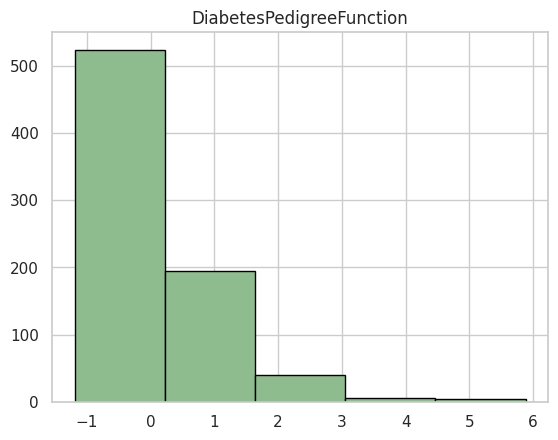

In [86]:
plt.hist(df['DiabetesPedigreeFunction'], bins = 5, edgecolor = 'black',color='DarkSeaGreen')
plt.title('DiabetesPedigreeFunction')
plt.show()

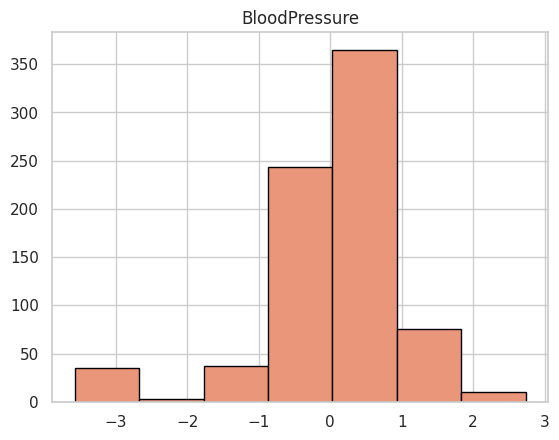

In [87]:
plt.hist(df['BloodPressure'], bins = 7, edgecolor = 'black',color='DarkSalmon')
plt.title('BloodPressure')
plt.show()

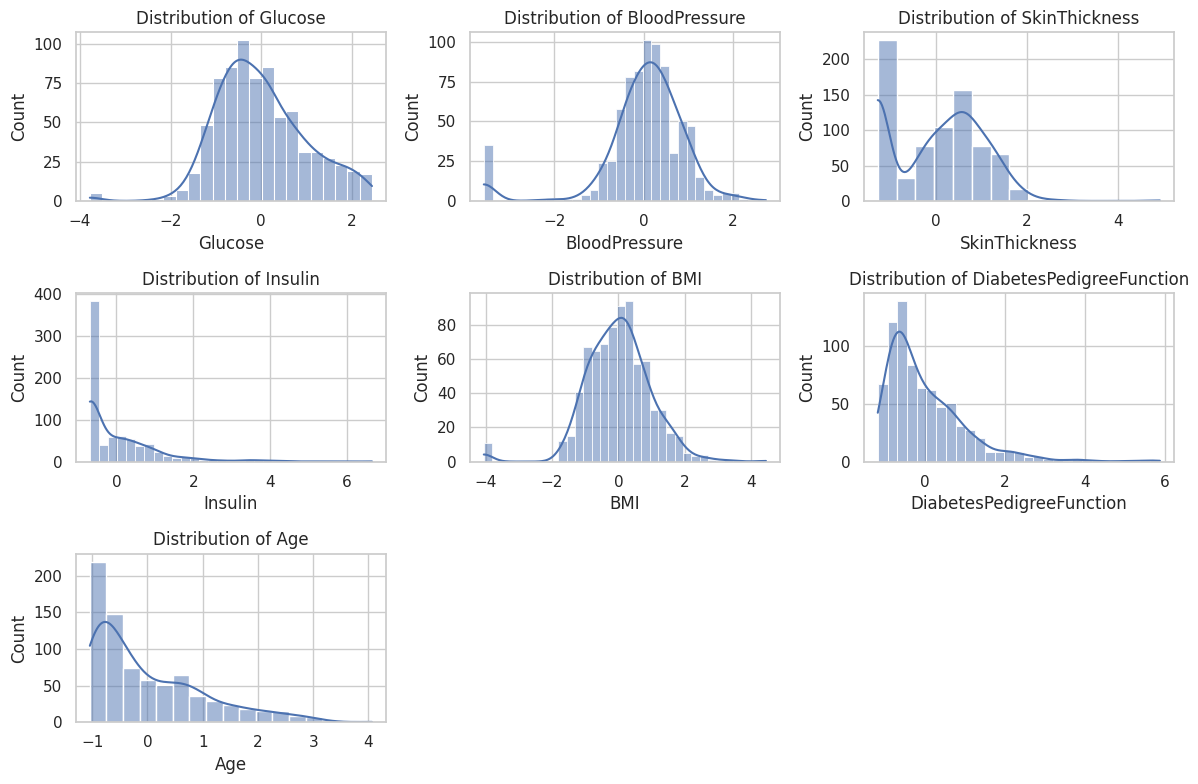

In [88]:
sns.set(style="whitegrid")

# Determine the number of rows and columns for subplots
num_features = len(numerical_features)
num_cols = 3  # Number of columns
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Number of rows

# Distribution of numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Relationship between different numerical features

Text(0.5, 1.0, 'Glucose vs BMI')

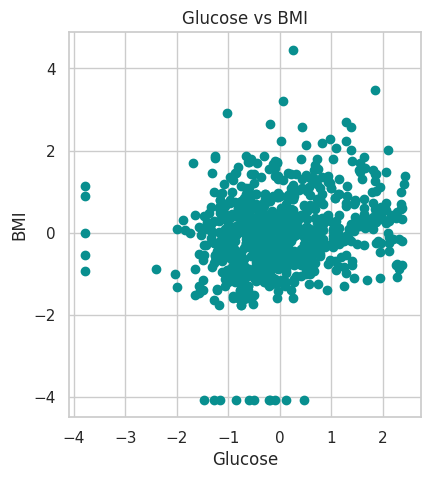

In [89]:
# Scatter plot for Glucose vs BMI
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.scatter(df['Glucose'], df['BMI'], c='#088F8F', linewidth=1)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs BMI')

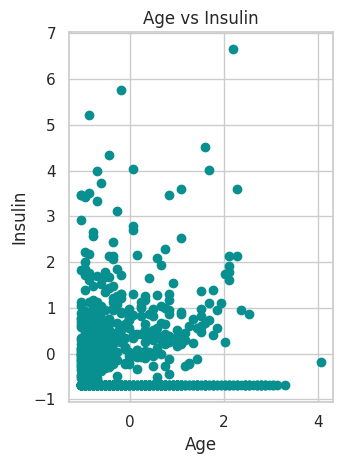

In [90]:
# Scatter plot for Age vs Insulin
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.scatter(df['Age'], df['Insulin'], c='#088F8F', linewidth=1)
plt.xlabel('Age')
plt.ylabel('Insulin')
plt.title('Age vs Insulin')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Blood Pressure vs Skin Thickness')

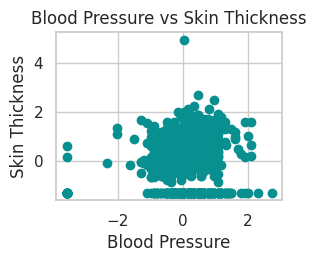

In [91]:
# Scatter plot for BloodPressure vs SkinThickness
plt.subplot(2, 2, 3)
plt.scatter(df['BloodPressure'], df['SkinThickness'], c='#088F8F', linewidth=1)
plt.xlabel('Blood Pressure')
plt.ylabel('Skin Thickness')
plt.title('Blood Pressure vs Skin Thickness')

# Analysing numerical features w.r.t Target

Number of Patients not diagnosed with Diabetes: 268
Number of Patients diagnosed with Diabetes: 500


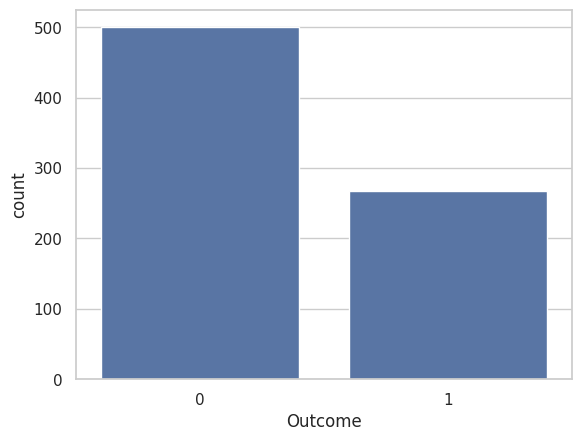

In [92]:
f = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']
sns.countplot(x='Outcome',data=df)
yes, no = y.value_counts()
print('Number of Patients not diagnosed with Diabetes:', no)
print('Number of Patients diagnosed with Diabetes:', yes)


In [93]:
Outcome_temp = df.Outcome.value_counts()
print("Percentage of patients without diabetes: " + str(round(Outcome_temp[0] * 100 / 303, 2)))
print("Percentage of patients with diabetes: " + str(round(Outcome_temp[1] * 100 / 303, 2)))

Percentage of patients without diabetes: 165.02
Percentage of patients with diabetes: 88.45


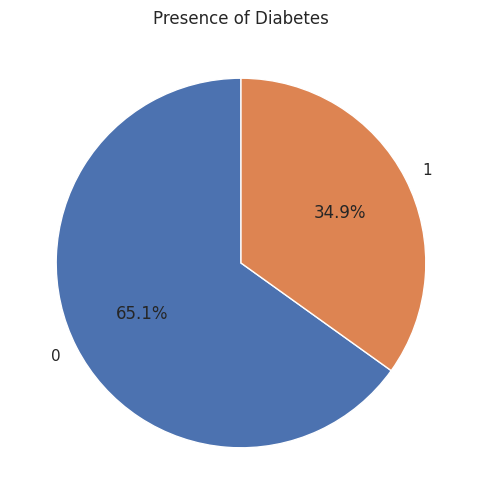

In [94]:
# Assuming 'Outcome' is the column indicating presence or absence of diabetes
diabetes_counts = df['Outcome'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(diabetes_counts.values, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Presence of Diabetes')
plt.show()

# Categorial Feature

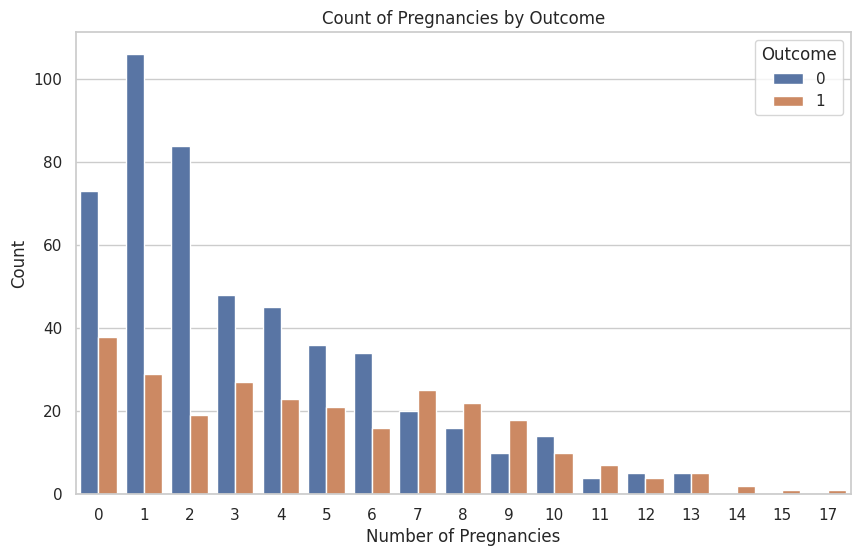

Number of Pregnancies for each Outcome:
Pregnancies  0    1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  \
Outcome                                                                        
0            73  106  84  48  45  36  34  20  16  10  14   4   5   5   0   0   
1            38   29  19  27  23  21  16  25  22  18  10   7   4   5   2   1   

Pregnancies  17  
Outcome          
0             0  
1             1  

Pregnancies Yes:
Pregnancies
0     38
1     29
2     19
3     27
4     23
5     21
6     16
7     25
8     22
9     18
10    10
11     7
12     4
13     5
14     2
15     1
17     1
Name: 1, dtype: int64

Pregnancies No:
Pregnancies
0      73
1     106
2      84
3      48
4      45
5      36
6      34
7      20
8      16
9      10
10     14
11      4
12      5
13      5
14      0
15      0
17      0
Name: 0, dtype: int64


In [95]:
# Plot the count of pregnancies with outcome as hue
plt.figure(figsize=(10, 6))
sns.countplot(x='Pregnancies', data=df, hue='Outcome')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.title('Count of Pregnancies by Outcome')
plt.show()

# Get the counts of Pregnancies grouped by Outcome
outcome_counts = df.groupby('Outcome')['Pregnancies'].value_counts().unstack(fill_value=0)

print('Number of Pregnancies for each Outcome:')
print(outcome_counts)

print('\nPregnancies Yes:')
print(outcome_counts.loc[1])

print('\nPregnancies No:')
print(outcome_counts.loc[0])

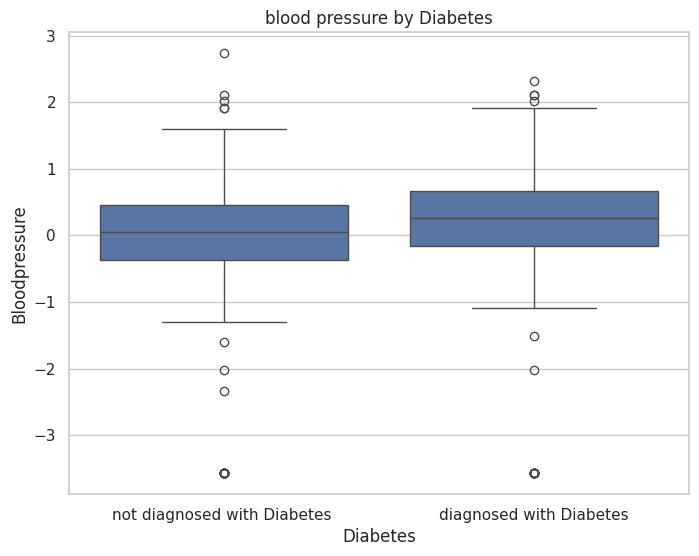

In [96]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title('blood pressure by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Bloodpressure')
plt.xticks([0, 1], ['not diagnosed with Diabetes ', 'diagnosed with Diabetes'])
plt.show()

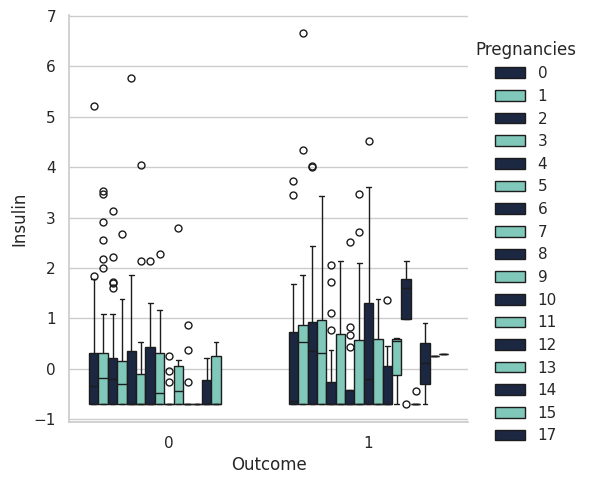

In [97]:
sns.catplot(x = 'Outcome',y='Insulin',data=df,kind='box',hue='Pregnancies', palette=sns.color_palette(['#162447', '#74d4c0']))

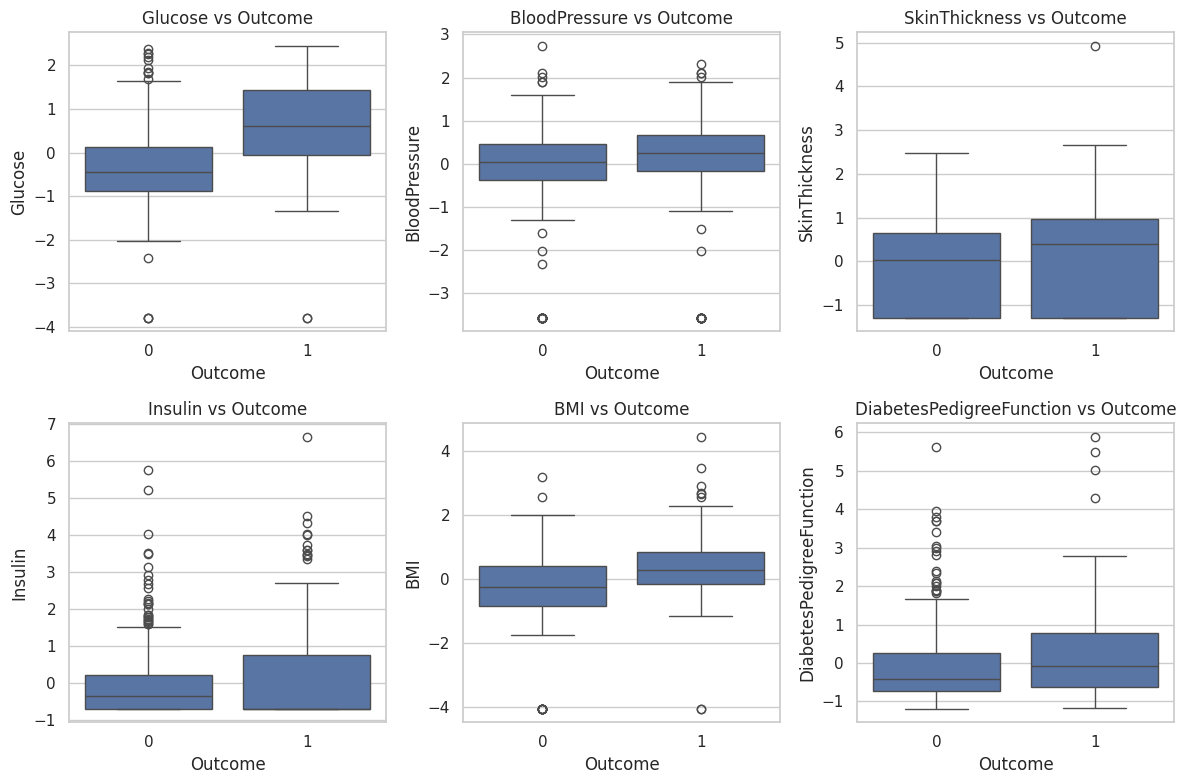

In [98]:
plt.figure(figsize=(12, 8))
num_plots = min(len(numerical_features), 6)  # Limit to 6 plots

for i in range(num_plots):
    plt.subplot(2, 3, i + 1)  # Adjusted to start subplot index from 1
    sns.boxplot(x='Outcome', y=numerical_features[i], data=df)
    plt.title(f'{numerical_features[i]} vs Outcome')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

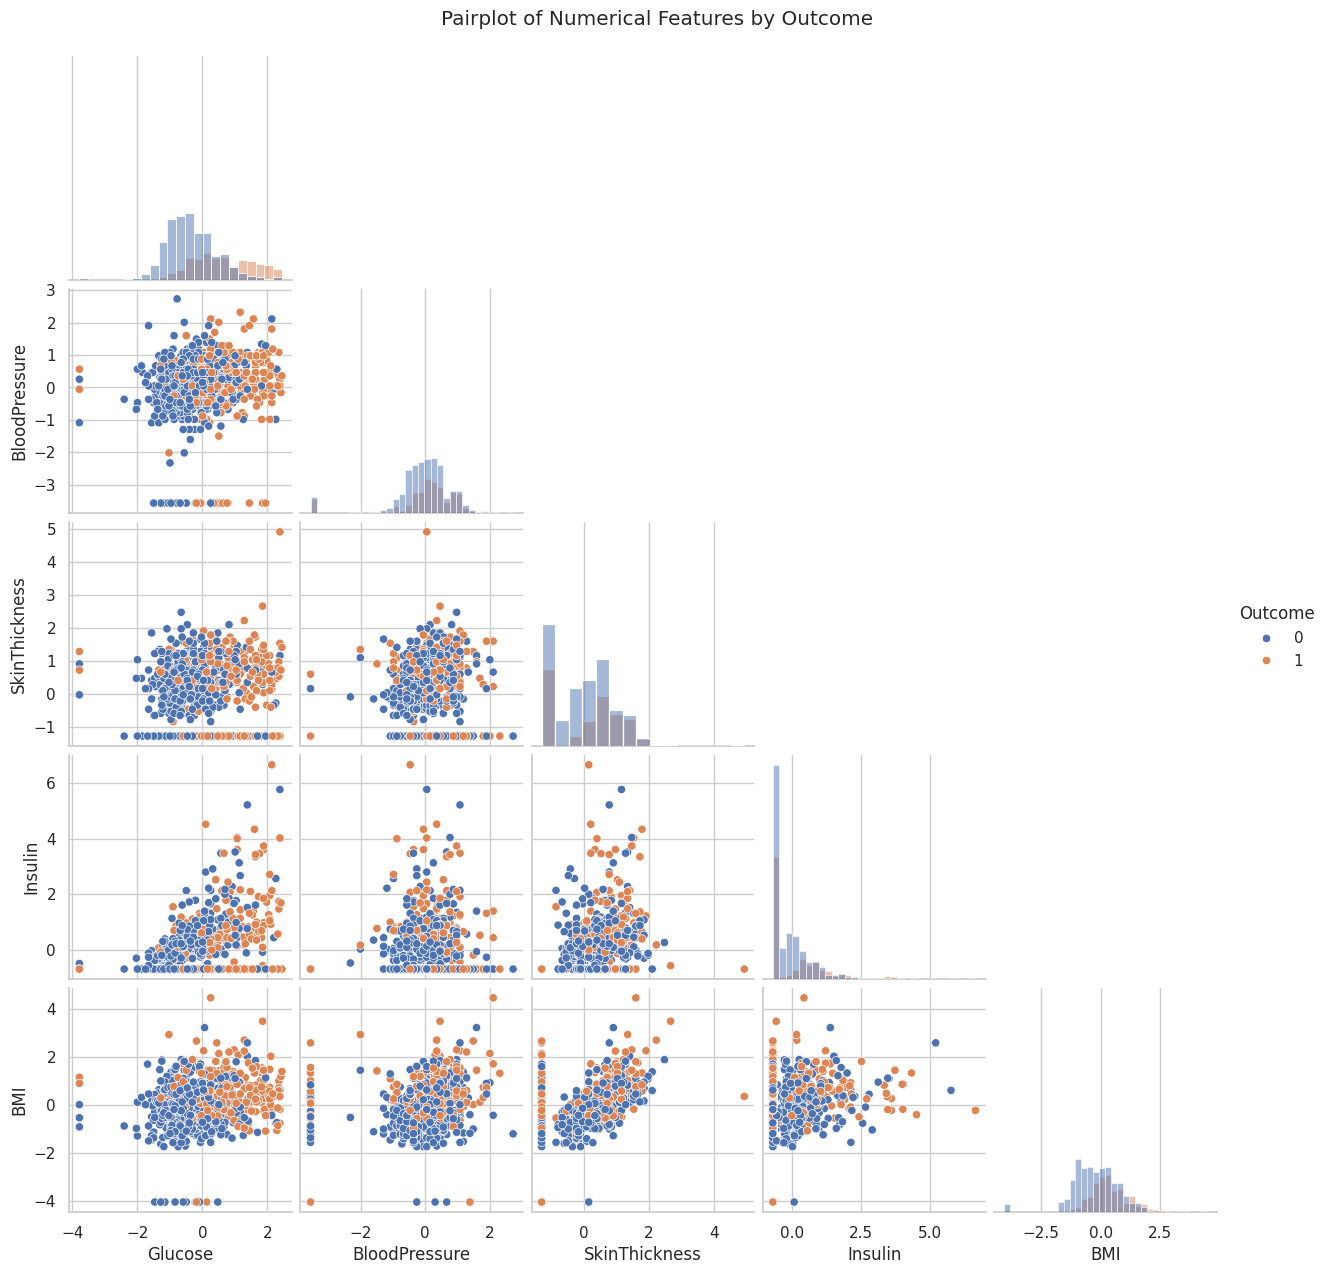

In [99]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[numerical_features[:5] + ['Outcome']], hue='Outcome', diag_kind='hist', corner=True)
plt.suptitle('Pairplot of Numerical Features by Outcome', y=1.02)
plt.show()


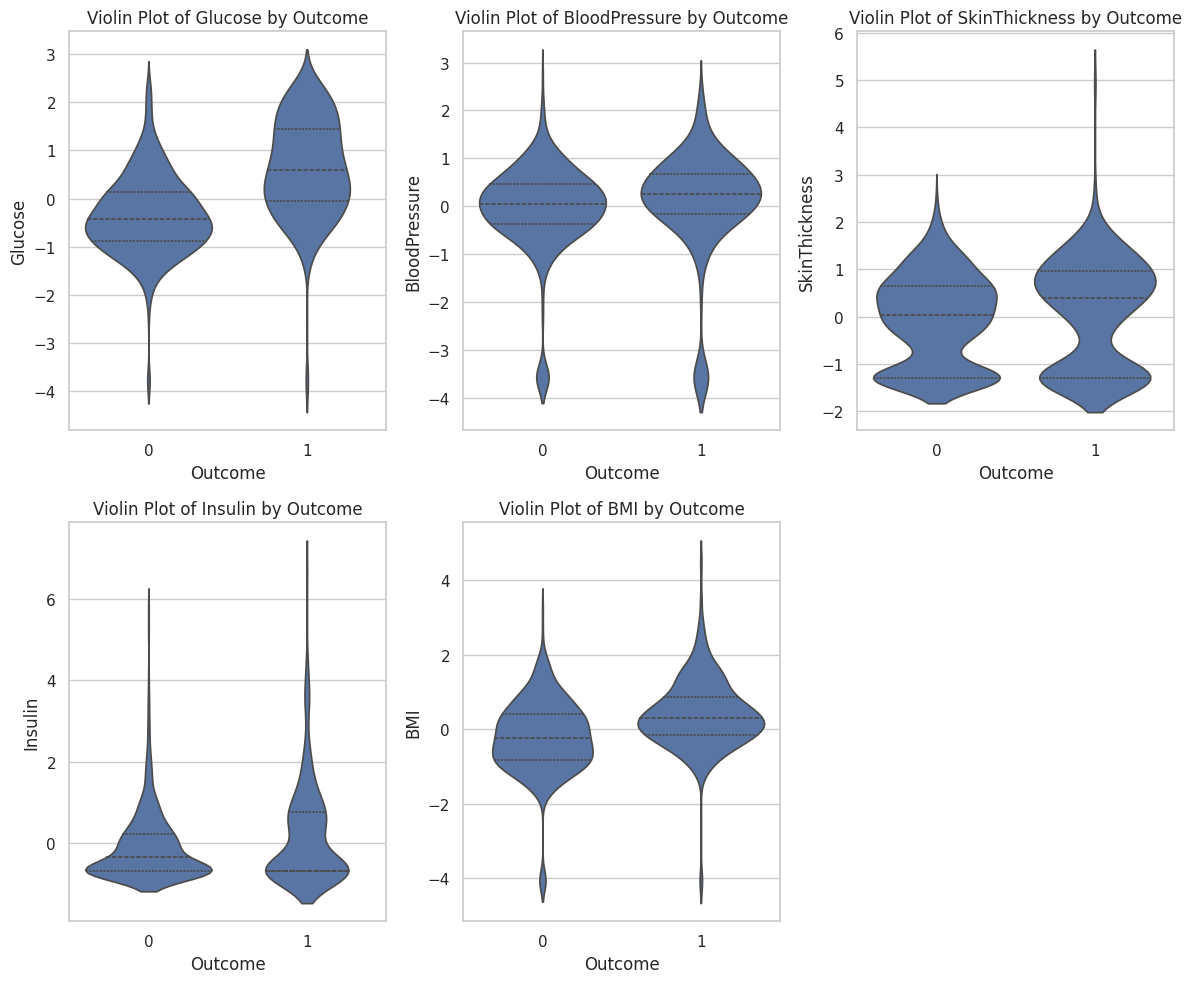

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

for i, feature in enumerate(numerical_features[:5]):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(x='Outcome', y=feature, data=df, inner='quartile')
    plt.title(f'Violin Plot of {feature} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


CORRELATION

<Axes: >

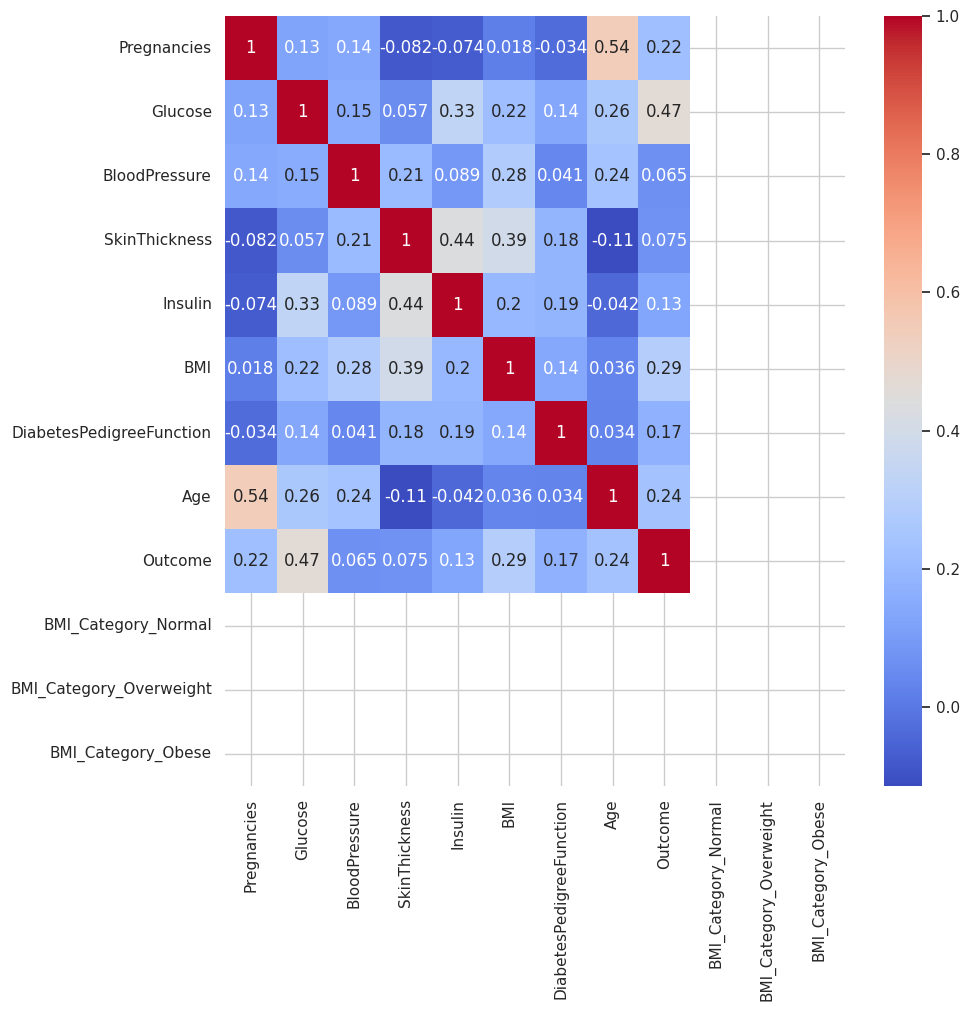

In [101]:
plt.figure( figsize = (10,10))
sns.heatmap(df.corr(), annot = True,cmap='coolwarm')

# Splitting the Features and Target

In [102]:
X = df.drop(columns=['Outcome',"BMI_Category_Normal",	"BMI_Category_Overweight",	"BMI_Category_Obese"], axis=1)
Y = df['Outcome']

In [103]:
print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [104]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Splitting the Data into Training data & Test Data

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [107]:
print(len(X_train), len(X_test) )
print(len(y_train), len(y_test) )


614 154
614 154


# Model Training

# Logistic Regression

In [108]:
l= LogisticRegression()
import warnings
warnings.filterwarnings('ignore')

In [109]:
# training the LogisticRegression model with Training data
l.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation

# Accuracy Score for LOGISTIC REGRESSION

In [110]:
# accuracy on training data
X_train_prediction_l = l.predict(X_train)
training_data_accuracy_l= accuracy_score(X_train_prediction_l, y_train)
print('Accuracy on Training data : ', round(training_data_accuracy_l,3))

Accuracy on Training data :  0.77


In [111]:
# Assuming l is your trained model and X_test, Y_test are your test data
X_test_prediction_l = l.predict(X_test)
test_data_accuracy_l = accuracy_score(y_test, X_test_prediction_l)
print('Accuracy on Test data:', round(test_data_accuracy_l, 3))

Accuracy on Test data: 0.753


In [112]:
# Assuming 'l' is your trained model and 'X_test', 'y_test' are your test data
X_test_prediction = l.predict(X_test)
conf_matrix = confusion_matrix(y_test, X_test_prediction)

In [113]:
print(conf_matrix)

[[79 20]
 [18 37]]


In [114]:
# Classification Report
class_report = classification_report(y_test, X_test_prediction)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



# Saving the trained model(logistic regression)

In [115]:
import pickle
filename = 'diabetes_log_reg_model.sav'
pickle.dump(l, open(filename, 'wb'))

In [116]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_log_reg_model.sav', 'rb'))

# WITHOUT PYTHON PACKAGE:

In [117]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Separate features and target
X = data.drop(columns='Outcome', axis=1)
y = data['Outcome']

# Standardize the data
X = (X - X.mean()) / X.std()

# Add a bias column to X
X.insert(0, 'bias', 1)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)


In [118]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [119]:
def compute_loss(y, y_pred):
    m = y.shape[0]
    loss = - (1 / m) * (np.dot(y.T, np.log(y_pred)) + np.dot((1 - y).T, np.log(1 - y_pred)))
    return loss



In [120]:
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    weights = np.zeros((n, 1))
    losses = []

    for i in range(iterations):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)
        loss = compute_loss(y, y_pred)
        losses.append(loss)

        # Gradient calculation
        gradient = (1 / m) * np.dot(X.T, (y_pred - y))

        # Update weights
        weights -= learning_rate * gradient

    return weights, losses


In [121]:
learning_rate = 0.01
iterations = 10000

weights, losses = gradient_descent(X_train, y_train, learning_rate, iterations)


In [122]:
def predict(X, weights):
    z = np.dot(X, weights)
    y_pred = sigmoid(z)
    return [1 if i > 0.5 else 0 for i in y_pred]


In [123]:
from sklearn.metrics import accuracy_score

# Training data accuracy
train_predictions = predict(X_train, weights)
train_accuracy = accuracy_score(y_train, train_predictions)
print('Accuracy on Training data : ', round(train_accuracy, 3))

# Test data accuracy
test_predictions = predict(X_test, weights)
test_accuracy = accuracy_score(y_test, test_predictions)
print('Accuracy on Test data: ', round(test_accuracy, 3))


Accuracy on Training data :  0.77
Accuracy on Test data:  0.753


# DECISION TREE

# with python package

In [124]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')  # Update the path to your dataset

# Separate features and target variable
X = diabetes.drop(columns='Outcome')
y = diabetes['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets manually (80-20 split)
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize DecisionTreeClassifier with a specific max_depth if needed
decision_tree = DecisionTreeClassifier(max_depth=3)

# Train the model
decision_tree.fit(X_train[:, :6], y_train)  # Only use the first 6 features for training

# Make predictions
y_train_pred = decision_tree.predict(X_train[:, :6])
y_test_pred = decision_tree.predict(X_test[:, :6])

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Decision Tree Training Accuracy: ", train_accuracy * 100)
print("Decision Tree Test Accuracy: ", test_accuracy * 100)


Decision Tree Training Accuracy:  75.7328990228013
Decision Tree Test Accuracy:  72.72727272727273


# WITHOUT PYTHON PACKAGE

In [126]:
import numpy as np
import pandas as pd
from collections import Counter  # Add this import

# Load the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')  # Update the path to your dataset

# Separate features and target variable
X = diabetes.drop(columns='Outcome').values
y = diabetes['Outcome'].values

# Standardize the features
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled

X_scaled = standard_scaler(X)

# Split the data into training and testing sets manually (80-20 split)
def train_test_split_manual(X, y, test_size=0.2):
    idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:idx], X[idx:]
    y_train, y_test = y[:idx], y[idx:]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_manual(X_scaled, y, test_size=0.2)

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def predict(self, X):
        return [self._predict(x, self.tree) for x in X]

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _information_gain(self, y, y1, y2):
        p = len(y1) / len(y)
        return self._entropy(y) - p * self._entropy(y1) - (1 - p) * self._entropy(y2)

    def _best_split(self, X, y):
        best_gain = 0
        best_split = None
        n_features = X.shape[1]
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                y_left = y[X[:, feature] <= threshold]
                y_right = y[X[:, feature] > threshold]
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                gain = self._information_gain(y, y_left, y_right)
                if gain > best_gain:
                    best_gain = gain
                    best_split = {
                        "feature": feature,
                        "threshold": threshold,
                        "left": (X[:, feature] <= threshold),
                        "right": (X[:, feature] > threshold)
                    }
        return best_split

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if n_labels == 1 or n_samples == 0 or (self.max_depth is not None and depth >= self.max_depth):
            leaf_value = self._most_common_label(y)
            return {"leaf": True, "value": leaf_value}

        split = self._best_split(X, y)
        if split is None:
            leaf_value = self._most_common_label(y)
            return {"leaf": True, "value": leaf_value}

        left_tree = self._build_tree(X[split["left"]], y[split["left"]], depth + 1)
        right_tree = self._build_tree(X[split["right"]], y[split["right"]], depth + 1)
        return {
            "leaf": False,
            "feature": split["feature"],
            "threshold": split["threshold"],
            "left": left_tree,
            "right": right_tree
        }

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def _predict(self, x, tree):
        if tree["leaf"]:
            return tree["value"]
        feature = tree["feature"]
        threshold = tree["threshold"]
        if x[feature] <= threshold:
            return self._predict(x, tree["left"])
        else:
            return self._predict(x, tree["right"])

# Initialize and train the custom Decision Tree model with a max depth of 4
custom_decision_tree = DecisionTree(max_depth=4)
custom_decision_tree.fit(X_train, y_train)
y_train_pred_custom = custom_decision_tree.predict(X_train)
y_test_pred_custom = custom_decision_tree.predict(X_test)




# Model Evaluation

# Accuracy Score for LOGISTIC REGRESSION

In [127]:
# Calculate accuracy for the custom Decision Tree model
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

train_accuracy_custom = accuracy(y_train, y_train_pred_custom)
test_accuracy_custom = accuracy(y_test, y_test_pred_custom)

print("Custom Decision Tree Training Accuracy: ", train_accuracy_custom)
print("Custom Decision Tree Test Accuracy: ", test_accuracy_custom)


Custom Decision Tree Training Accuracy:  0.7915309446254072
Custom Decision Tree Test Accuracy:  0.7402597402597403


# Building a predictive model (logistic Regression)

In [128]:
import numpy as np
import pandas as pd
from collections import Counter  # Add this import

# Load the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')  # Update the path to your dataset

# Separate features and target variable
X = diabetes.drop(columns='Outcome').values
y = diabetes['Outcome'].values

# Standardize the features
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

X_scaled, mean, std = standard_scaler(X)

# Split the data into training and testing sets manually (80-20 split)
def train_test_split_manual(X, y, test_size=0.2):
    idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:idx], X[idx:]
    y_train, y_test = y[:idx], y[idx:]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_manual(X_scaled, y, test_size=0.2)

# Assuming 'l' is your trained model (replace with your actual model instance)
class LogisticRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        learning_rate = 0.001
        n_iters = 1000

        for _ in range(n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

# Initialize and train the logistic regression model
l = LogisticRegression()
l.fit(X_train, y_train)

# Given input data according to your dataset's features
input_data = {
    'Pregnancies': 6,
    'Glucose': 148,
    'BloodPressure': 72,
    'SkinThickness': 35,
    'Insulin': 0,
    'BMI': 33.6,
    'DiabetesPedigreeFunction': 0.627,
    'Age': 50
}

# Include all features used during training
selected_features = [
    input_data['Pregnancies'],
    input_data['Glucose'],
    input_data['BloodPressure'],
    input_data['SkinThickness'],
    input_data['Insulin'],
    input_data['BMI'],
    input_data['DiabetesPedigreeFunction'],
    input_data['Age']
]

# Convert to numpy array and standardize using training mean and std
input_data_np = np.asarray(selected_features).reshape(1, -1)
input_data_np_scaled = (input_data_np - mean) / std

# Predict using the trained model
prediction = l.predict(input_data_np_scaled)

# Output the prediction
if prediction[0] == 0:
    print('The Person does not have diabetes.')
else:
    print('The Person has diabetes.')


The Person has diabetes.


# Saving the trained model  (DECISION TREE CLASSIFIER)

In [129]:
import pickle

In [130]:
filename = 'diabetes_model_dt.sav'
pickle.dump(decision_tree, open(filename, 'wb'))

In [131]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model_dt.sav', 'rb'))